In [67]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Set data set directory strings to variables
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read dataset csv's into dataframe
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Display mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [68]:
#Review mouse data
print(mouse_metadata.columns)
print("-----------------")
print(mouse_metadata.dtypes)
print("-----------------") 
print(mouse_metadata.count())
print("-----------------")
print(mouse_metadata["Sex"].value_counts())
print("-----------------")
print(mouse_metadata["Drug Regimen"].value_counts())
print("-----------------")
print(f'Unique Mouse IDs: {mouse_metadata["Mouse ID"].nunique()}')


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
-----------------
Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object
-----------------
Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64
-----------------
Male      125
Female    124
Name: Sex, dtype: int64
-----------------
Ketapril     25
Zoniferol    25
Infubinol    25
Naftisol     25
Ramicane     25
Propriva     25
Placebo      25
Ceftamin     25
Capomulin    25
Stelasyn     24
Name: Drug Regimen, dtype: int64
-----------------
Unique Mouse IDs: 249


In [69]:
# Display study data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [70]:
# Review study data
print(study_results.columns)
print("-----------------")
print(study_results.dtypes)
print("-----------------") 
print(study_results.count())
print("-----------------")
print(f'Unique Mouse IDs: {study_results["Mouse ID"].nunique()}')

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')
-----------------
Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object
-----------------
Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
-----------------
Unique Mouse IDs: 249


In [71]:
# Merge data to attribute Drug Regimen to Tumor Volume
mergeData = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
mergeData
#mergeData.sort_values(["Mouse ID", "Timepoint"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [72]:
# Use .duplicated to view duplicates across Mouse ID and timepoints series in mergeData
mergeDataDupe = mergeData[mergeData.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
mergeDataDupe.sort_values(by = "Mouse ID").head(50).tail(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [73]:
# Duplicates found in dataset
# Use .drop_duplicates across "Mouse ID","Timepoint" and keep only one value
mergeDataClean = mergeData.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first')

# Recheck for duplicates
mergeDataCleanChk = mergeDataClean[mergeDataClean.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
mergeDataCleanChk.sort_values(by = "Mouse ID").head(50).tail(50)
print(mergeDataCleanChk)

# Check that the number of Mouse IDs is the same as original count
print(f'{mergeDataClean["Mouse ID"].nunique() == study_results["Mouse ID"].nunique()}')

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
True


In [74]:
#Final Review
    # 1893 rows × 8 columns
    # No Null values
    # Data types OK
    # Values OK
    # No duplicate Mouse IDs with duplicate timepoints in mergeDataClean
    # Use mergeDataClean as the dataset
# OK to proceed with calculations

In [75]:
# Generate a summary statistics table consisting of the following stats on the tumor 
#     volume for each drug regimen:
# Separate the Tumor Vol and Drug Regimen
tumorVoldf = mergeDataClean.loc[:,["Tumor Volume (mm3)","Drug Regimen"]]

# Group by the drug regimen
drugTumorGroups = tumorVoldf.groupby("Drug Regimen")
# Find mean
drugMeanSer = drugTumorGroups.mean()
# Find Median
drugMedSer = drugTumorGroups.median()
# Find Variance
drugVarSer = drugTumorGroups.var(ddof = 0)
# Find Standard Deviation
drugSTDSer = drugTumorGroups.std(ddof = 0)
# Find SEM
drugSEMSer = drugTumorGroups.sem(ddof=0)

# Assemble summary table
summaryStatsdf = pd.DataFrame({"Mean":drugMeanSer.iloc[:,0], 
                             "Median":drugMedSer.iloc[:,0],
                             "Variance":drugVarSer.iloc[:,0],
                             "St Dev":drugSTDSer.iloc[:,0],
                             "SEM":drugSEMSer.iloc[:,0]
                            })
# Format ummary table
summaryStatsdf["Mean"] = summaryStatsdf["Mean"].map("{:,.3f}".format)
summaryStatsdf["Median"] = summaryStatsdf["Median"].map("{:,.3f}".format)
summaryStatsdf["Variance"] = summaryStatsdf["Variance"].map("{:,.3f}".format)
summaryStatsdf["St Dev"] = summaryStatsdf["St Dev"].map("{:,.3f}".format)
summaryStatsdf["SEM"] = summaryStatsdf["SEM"].map("{:,.3f}".format)
summaryStatsdf

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.839,4.984,0.329
Ceftamin,52.591,51.776,39.069,6.251,0.468
Infubinol,52.885,51.821,42.886,6.549,0.491
Ketapril,55.236,53.699,68.189,8.258,0.602
Naftisol,54.332,52.509,65.818,8.113,0.595
Placebo,54.034,52.289,60.830,7.799,0.580
Propriva,52.393,50.910,42.862,6.547,0.524
Ramicane,40.217,40.673,23.384,4.836,0.320
Stelasyn,54.233,52.432,59.122,7.689,0.572


In [76]:
#print(drugTumorGroups.mean())
#print(drugTumorGroups.median())
#print(drugTumorGroups.var())
#print(drugTumorGroups.std(ddof = 0))
#print(drugTumorGroups.sem(ddof = 0))

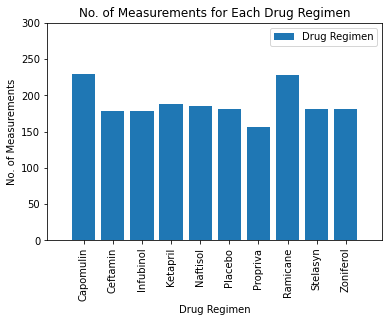

In [151]:
# Create and display bar plot for total number of measurements for each regimen
# DataFrame.plot() version

# Get count values
drugGroups = mergeDataClean.groupby("Drug Regimen")
countValues = drugGroups["Drug Regimen"].count()

#print(yValues.loc[:,0])   #DELETE

drugMeasureChart = countValues.plot(kind = "bar", width = 0.8, title = "No. of Measurements for Each Drug Regimen")
drugMeasureChart.set_ylabel("No. of Measurements")
plt.legend()
plt.xticks(rotation= 90)
plt.xlim(-1.25, len(np.arange(len(xValues)))+ 0.25)
plt.ylim(0, max(countValues) + 70)
plt.show()

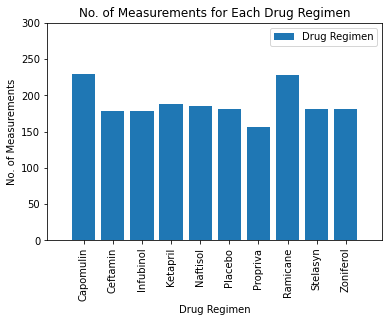

In [152]:
#pyplot version
# Get count values
drugGroups = mergeDataClean.groupby("Drug Regimen")
countValues = drugGroups["Drug Regimen"].count()
xValues = countValues.index
yValues = countValues

# Plot graph
plt.bar(xValues, yValues, width=0.8)

# Format graph
plt.xticks(rotation = 90)
plt.title("No. of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Measurements")
plt.xlim(-1.25, len(np.arange(len(countValues.index)))+ 0.25)
plt.ylim(0, max(countValues)+70)
plt.legend([countValues.index.name], loc="best")
plt.show()

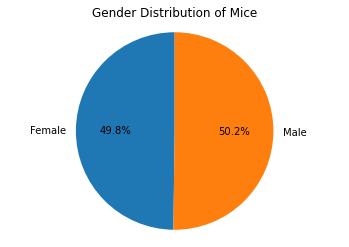

In [189]:
# Create and display pie plot for total number of mice per gender
# DataFrame.plot() version

# Get count values
genderGroups = mergeDataClean.groupby("Sex")
genderCountValues = genderGroups["Mouse ID"].nunique()

#print(genderCountValues)
femaleCount = genderCountValues["Female"]
maleCount = genderCountValues["Male"]
labels = genderCountValues.index


genderChart = genderCountValues.plot(kind="pie", autopct="%1.1f%%", shadow=False,startangle=90, title="Gender Distribution of Mice")

#plt.pie(genderCountValues, labels = labels, autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.xlabel("")
plt.ylabel("")
# colors "lightskyblue"
plt.show()

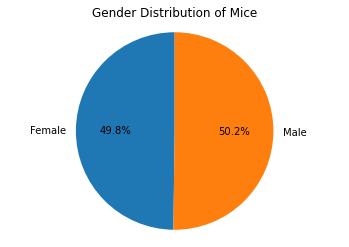

In [190]:
# Create and display pie plot for total number of mice per gender
# pyplot version

#print(genderCountValues)


plt.pie(genderCountValues, labels = labels, autopct="%1.1f%%", shadow=False,startangle=90)
plt.title("Gender Distribution of Mice")
plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()